# DEL 1

### 1. Hur hänger AI, ML och DL ihop?

- AI (Artificiell intelligens): Det breda området som syftar till att skapa maskiner som kan utföra uppgifter som normalt kräver mänsklig intelligens.
- ML (Maskininlärning): Ett delområde inom AI som bygger på att datorer lär sig mönster från data utan att vara explicit programmerade.
- DL (Djupinlärning): Ett delområde inom ML som använder neurala nätverk med många lager ("deep neural networks") för att modellera mycket komplexa samband.
- Hierarki: AI -> ML -> DL


### 2. De fyra problemkategorierna inom ML


- Supervised learning – vi har in- och utdata (labels), t.ex. regression eller klassificering.
- Unsupervised learning – vi har bara indata, vill hitta mönster, t.ex. klustring.
- Reinforcement learning – en agent lär sig genom trial-and-error via belöningar/straff.
- Semi-supervised learning – en blandning: lite data är märkt (labels), resten omärkt.

### 3. Förklaringar

a) Tränings-, validerings- och testdata
- Träningsdata: används för att lära modellen.
- Valideringsdata: används för att justera hyperparametrar och undvika överanpassning.
- Testdata: används enbart i slutet för att mäta generaliseringsförmågan.

b) K-delad korsvalidering (k-fold cross-validation)
- Data delas upp i k lika stora delar ("folds").
- Träning sker på k-1 delar och test på den återstående.
- Upprepas k gånger så att alla delar används som test en gång.
- Resultaten snittas -> robustare uppskattning av modellens prestanda.

c) RMSE (Root Mean Squared Error)
Ett mått på skillnaden mellan förutsagda och verkliga värden.
Formel: 
- RMSE = √(1/n ∑(y_pred - y_true)²)
- Tolkas som "genomsnittligt fel i samma enhet som y".

d) Parameter vs hyperparameter
- Parameter: Lärs av modellen (t.ex. vikter i en linjär regression).
- Hyperparameter: Ställs in innan träning, styr lärandet (t.ex. learning rate, antal träd i Random Forest).

e) Grid search (GridSearchCV)
- Testar systematiskt alla kombinationer av hyperparametrar i ett "rutnät" (grid).
- "Search" -> sökning efter bästa kombination.
- refit=True: när bästa kombination hittats tränas en slutlig modell om på hela träningsdatamängden med dessa inställningar.

f) Kategorisk data
- Nominal data: Kategorier utan ordning (ex. färg: röd, blå, grön).
- Ordinal data: Kategorier med naturlig ordning (ex. betyg: lågt, medel, högt).
Hantering:
- One-hot encoding: ny binär kolumn för varje kategori.
- Dummy-variable encoding: liknar one-hot men utesluter en kategori (för att undvika multikollinearitet).
- Ordinal encoding: ersätter kategorier med heltal som reflekterar ordningen.

g) Feature engineering
- Processen att skapa, transformera eller välja variabler ("features") för att förbättra modellens prestanda. Ex: log-transformera variabler, skapa interaktionstermer, extrahera datumfunktioner (månad, veckodag).

h) Principle of parsimony (Occam’s razor)
- En enklare modell föredras framför en mer komplex om båda förklarar datan ungefär lika bra.


### 4. En modell är en förenkling av verkligheten

Alla modeller reducerar verkligheten till matematiska samband. T.ex. en regressionsmodell som förutspår bostadspriser kan aldrig fånga alla faktorer i verkligheten (politik, känslor, mode) -> men det räcker ofta med en förenkling.


### 5. Överanpassning (overfitting)

När en modell lär sig "brus" eller detaljer i träningsdatan som inte generaliserar till ny data.
- Resultat: hög träffsäkerhet på träning, låg på test.



### 6. Högre är bättre i scikit-learn scoring

Scikit-learn designar scoring-metriker så att ett högre värde alltid betyder bättre resultat. Därför används t.ex. neg_mean_squared_error, eftersom MSE normalt är "lägre är bättre". Genom att ta det negativa kan samma logik ("högre är bättre") behållas.

### 7. Datakategorier

- Tvärsnittsdata: Samlas in vid en viss tidpunkt. Ex: enkätsvar från 1000 personer 2025.
- Tidsseriedata: Samlas in över tid. Ex: aktiekurser per dag.
- Paneldata / Longitudinaldata: Kombination av båda – flera enheter observeras över tid. Ex: årlig inkomst för 500 personer under 10 år.


### 8. Verkliga tillämpningsområden inom ML

Exempel (nutida trender):
- Hälsosektorn: Diagnos från röntgenbilder (deep learning).
- Finans: Kreditbedömning, algoritmisk handel.
- Transport: Självkörande bilar.
- Handel: Rekommendationssystem (Netflix, Spotify, Amazon).
- Industri: Prediktivt underhåll (förutse när maskiner går sönder).
- Språk & text: Chatbots, översättning, sentimentanalys.

### 9. Logiken bakom neg_mean_squared_error

- MSE: lägre = bättre.
- Scikit-learn scoring: konvention = högre = bättre.
- Därför multipliceras MSE med -1 → så att bästa modell har högst (minst negativt) värde.

### 10. Koduppgifter

In [ ]:
from sklearn.model_selection import train_test_split
help(train_test_split)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

### 11. Varför proportionerna blir 60–20–20

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

Första splitten:
- test_size=0.2 -> 20% av datan hamnar i test set.
- Resten, 80%, blir train_full.

Andra splitten:
- Vi delar upp train_full (80%) i train och validation.
- test_size=0.25 -> 25% av dessa 80% blir validation set.
- 25% av 80% = 0.25 × 80% = 20% av hela datan.
- Resten blir 60% av hela datan (train).

Slutresultat:
- 60% train
- 20% validation
- 20% test

# DEL 2

### 1. Checklistan med sju steg

1. Definiera problemet och skapa en helhetsbild 
* Klargör målet med projektet, varför det är relevant och hur framgång ska mätas. Identifiera intressenter och möjliga befintliga lösningar.

2. Få tillgång till datan
* Säkerställ vilken data som behövs, hur den kan samlas in och om den kan hanteras på ett lagenligt sätt. Dela upp i tränings-, validerings- och testdata.

3. Utforska datan (EDA)
* Analysera datan statistiskt och visuellt för att förstå mönster, samband och eventuella problem. Avgör om ML-modellering faktiskt behövs eller om enklare analys räcker.

4. Bearbeta datan
* Genomför data cleaning och transformationer, hantera saknade värden, outliers och irrelevanta variabler. Eventuell feature engineering görs här.

5. ML-modellering
* Testa olika modeller, justera hyperparametrar, gör variabelselektion och utvärdera prestanda på valideringsdata. Slutligen utvärderas generaliseringsförmågan på testdatan.

6. Presentera lösningen för intressenter
* Anpassa presentationen efter målgruppen. Tekniska intressenter vill ha detaljer, medan beslutsfattare ofta vill ha resultat och konsekvenser. Visualiseringar är ofta viktiga.

7. Produktionssättning och övervakning
* Implementera modellen i praktiken, följ upp dess prestanda över tid och säkerställ att den fortsätter fungera när ny data tillkommer. Modellen kan behöva uppdateras eller tränas om.

### 2. Vad menas med att en modell produktionssätts?

Att produktionssätta en modell innebär att den inte bara är en prototyp eller ett experiment, utan att den integreras i ett verkligt system där den används kontinuerligt. Exempel: en rekommendationsmotor på Netflix som kör i realtid. Produktionssättning kräver ofta:
- Skalbarhet (hantera många förfrågningar)
- Övervakning (kontroll av prestanda över tid)
- Möjlighet till uppdateringar och reträning

### 3. Vad är scikit-learn?

Scikit-learn är ett populärt Python-bibliotek för maskininlärning. Det används för klassificering, regression, klustring, dimensionreduktion, modellval och förbehandling av data.

Centrala designprinciper:
- Enkelhet och konsistens (samma API för olika modeller)
- Moduläritet (kombinera komponenter enkelt)
- Återanvändbarhet (pipelines)
- Öppenhet och dokumentation

### 4. Vad är TensorFlow och Keras?

TensorFlow: Ett ramverk utvecklat av Google för att bygga och träna neurala nätverk. Det är kraftfullt men ganska komplext.

Keras: Ett högre abstraktionslager ovanpå TensorFlow (numera integrerat i TensorFlow). Det gör det enklare och mer användarvänligt att bygga neurala nätverk.

### 5. Dialogen mellan Kalle och Stina

Kalle har delvis rätt i att man vill förbättra modellen om den presterar dåligt.

Men Stina har rätt i att man får inte använda testdatan för modelljustering, eftersom testdatan ska vara en "helt ny" utvärdering av den slutgiltiga modellen.

Rätt tillvägagångssätt är att dela upp i träning, validering och test:
- Träning används för att lära modellen.
- Validering används för hyperparametrar och modellval.
- Test används enbart för slutgiltig utvärdering.

### 6. Varför många AI/ML-projekt inte når målen

- Dålig datakvalitet (för lite data, felaktig data, bias).
- Otydliga mål (projektet drivs av teknik, inte av ett verkligt behov).
- Överoptimism (förväntar sig "magiska lösningar").
- Brist på domänkunskap (algoritmen kanske funkar, men problemet var fel definierat).
- Svårigheter med produktionssättning (svårt att integrera med befintliga system).

### 7. ??

### 8. Förklara koden

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from joblib import dump, load

X, y = make_regression(n_samples=20000, n_features=3, noise=0.1)
model = LinearRegression().fit(X, y)
dump(model, "linear_model.joblib")
model_loaded = load("linear_model.joblib")
print(model_loaded.predict(X[:5]))

[-82.41475131  -0.32991287 -19.25320566  42.91759848  94.849153  ]


- make_regression(...): Skapar ett syntetiskt dataset för regression med 20 000 exempel, 3 features och lite brus.
- LinearRegression().fit(X, y): Tränar en linjär regressionsmodell på datan.
- dump(model, "linear_model.joblib"): Sparar modellen i en fil på disk.
- load("linear_model.joblib"): Läser in den sparade modellen.
- predict(X[:5]): Gör prediktioner på de 5 första datapunkterna.

### 9. Flöde för regression med datasetet data_01.csv

In [2]:
# a) Läs in datasete

import pandas as pd

df = pd.read_csv("data_01.csv")

In [3]:
# b) Dela upp i X och y
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
# c) Dela upp i train, val, test
from sklearn.model_selection import train_test_split

# Först train + val och test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sedan train och val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


In [5]:
# d) Träna två regressionsmodeller
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [7]:
# e) Utvärdera på valideringsdata
from sklearn.metrics import mean_squared_error

lin_pred = lin_reg.predict(X_val)
tree_pred = tree_reg.predict(X_val)

lin_rmse = mean_squared_error(y_val, lin_pred)
tree_rmse = mean_squared_error(y_val, tree_pred)

print("Linear RMSE:", lin_rmse)
print("Tree RMSE:", tree_rmse)

Linear RMSE: 12.904626184997369
Tree RMSE: 9872.294151696435


In [8]:
# f) Välj bästa modell och träna om på train + val
best_model = lin_reg if lin_rmse < tree_rmse else tree_reg
best_model.fit(X_train_val, y_train_val)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# g) Utvärdera på testdatan
test_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred)
print("Test RMSE:", test_rmse)

Test RMSE: 11.367343182095885


In [11]:
# h) Träna på hela datasetet
final_model = best_model.fit(X, y)

### 10. Flöde för salary_dataset.csv

In [ ]:
# a) Läs in och dela upp
df = pd.read_csv("salary_dataset.csv")
X = df[["YearsExperience"]]   # Oberoende variabel // Input
y = df["Salary"]              # Beroende variabel // Output

In [13]:
# b) Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# c) Träna två modeller med k-korsvalidering
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)

scoring = "neg_root_mean_squared_error"

lin_scores = cross_validate(lin_reg, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
tree_scores = cross_validate(tree_reg, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

print("Linear CV RMSE:", -lin_scores["test_score"].mean())
print("Tree CV RMSE:", -tree_scores["test_score"].mean())


Linear CV RMSE: 5293.2031969987775
Tree CV RMSE: 5611.57858424216


In [16]:
# d) Välj bästa och utvärdera på testsetet
best_model = lin_reg if -lin_scores["test_score"].mean() < -tree_scores["test_score"].mean() else tree_reg
best_model.fit(X_train, y_train)

test_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred)
print("Test RMSE:", test_rmse)

Test RMSE: 49830096.855908334


### 11. Arbeta med kategorisk data (mpg-datasetet)

In [17]:
# a) Läs in datasetet
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = sns.load_dataset("mpg")
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [18]:
# b) Droppa rader med saknade värden
df = df.dropna()

In [ ]:
# c) Droppa kolumnen name
df = df.drop("name", axis=1)

In [21]:
# d) One-hot encoding på origin
df = pd.get_dummies(df, columns=["origin"], drop_first=True)

In [22]:
# e) Dela upp i X och y
X = df.drop("mpg", axis=1)
y = df["mpg"]

In [23]:
# f) Train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# g) Träna och utvärdera linjär regression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
print("Test RMSE:", rmse)

Test RMSE: 10.602279011688342


### 12. Förbättra resultatet på huspriser i Kalifornien (kap 2.2-exemplet)

Huvudförbättringar:
1. Feature Engineering
- rooms_per_household: Rum per hushåll
- bedrooms_per_room: Sovrum per rum
- population_per_household: Personer per hushåll
- income_cat: Inkomstkategorier
- age_cat: Ålderskategorier för hus

2. Variabelselektion
- Univariat selektion: Väljer de 12 bästa features baserat på F-statistik
- Recursive Feature Elimination (RFE): Väljer 10 features genom iterativ eliminering

3. Utökad Hyperparameteroptimering
- Använder RandomizedSearchCV för effektivitet
- Utökat parameterrutnät med fler alternativ för n_estimators, max_depth, min_samples_split, etc.

4. Modellkomparison
Koden testar fyra olika varianter:
- Original Random Forest
- Optimerad RF med alla features
- RF med univariat feature selection
- RF med RFE feature selection

5. Förbättrad Utvärdering
- Feature importance-analys
- Visualiseringar av prediktionsfel
- Flera mätvärden (RMSE, MAE, procentuellt fel)

Träningsdata: 12381 observationer
Valideringsdata: 4127 observationer
Testdata: 4127 observationer
Efter borttagning av NaN - Träning: 12261, Validering: 4084, Test: 4083
Antal features efter feature engineering: 15
Nya features inkluderar: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'dmy_<1H OCEAN', 'dmy_INLAND', 'dmy_NEAR BAY', 'dmy_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

=== VARIABELSELEKTION ===
Utvalda features (univariat): ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income', 'dmy_<1H OCEAN', 'dmy_INLAND', 'dmy_NEAR BAY', 'dmy_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room']

Kör Recursive Feature Elimination...
Utvalda features (RFE): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income', 'dmy_INLAND', 'rooms_per_household', 'bedrooms_per_room', 'population_per_h

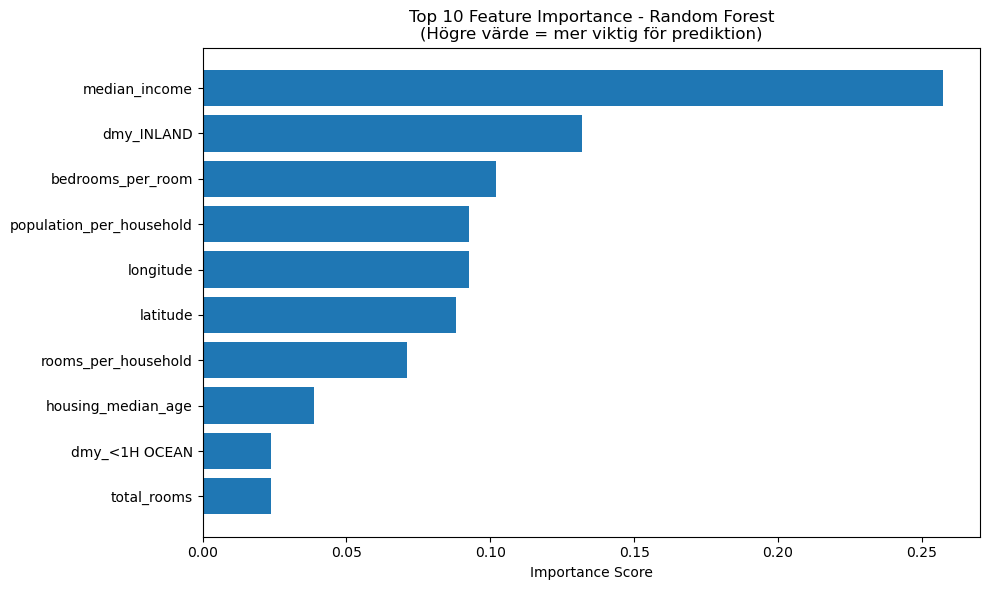

<Figure size 640x480 with 0 Axes>


=== SLUTLIG TESTNING PÅ HELT OSEDD DATA ===
Tränar slutlig modell: RF med RFE
Tränar på hela träningsdatasetet för maximal prestanda...

🎯 SLUTLIGT TESTRESULTAT:
RMSE på testdata: $47,634.24
MAE på testdata:  $31,050.21
Medelpris:        $206,754.57
RMSE som % av medelpris: 23.0%
MAE som % av medelpris:  15.0%

Tolkning: Modellen är i genomsnitt fel med $31,050 (MAE)
och har större fel på $47,634 (RMSE) på grund av outliers.


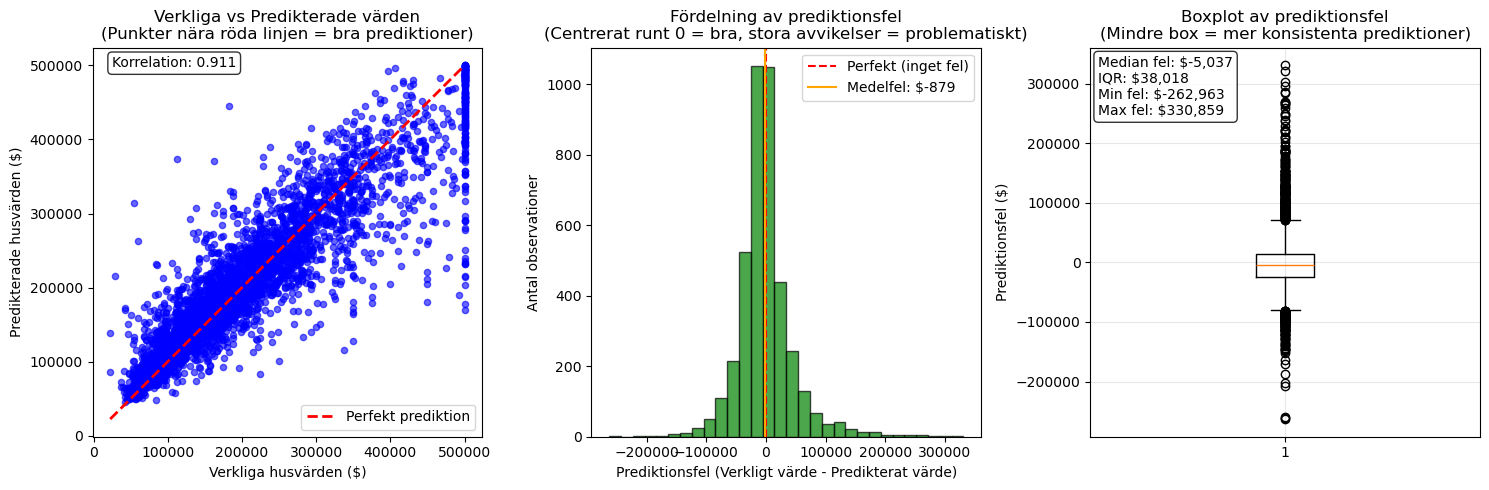


📊 ANALYS AV PREDIKTIONSFEL:
Antal stora fel (outliers): 223 av 4083 (5.5%)
Medianfel: $-5,037 (närmare 0 = bättre)
Standardavvikelse för fel: $47,626 (lägre = mer konsistent)
Sparade även RFE selector som 'rfe_selector.pkl'
✅ Slutlig modell sparad som 'improved_rf_model.pkl'
För att ladda modellen senare: modell = joblib.load('improved_rf_model.pkl')

=== DEMONSTRATION: PREDIKTERA NYA HUSPRISER ===
Nya distrikt att prediktera:
 longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  dmy_<1H OCEAN  dmy_INLAND  dmy_NEAR BAY  dmy_NEAR OCEAN
   -118.30      34.2                35.0        880.0           200.0       500.0       220.0            4.2              0           1             0               0
   -117.85      33.9                20.0       1200.0           300.0       750.0       280.0            5.1              1           0             0               0

Applicerar samma feature engineering och preprocessing...
Använde RFE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler
import joblib
import time

# Ladda in California housing dataset
housing_original = pd.read_csv("housing.csv")

# Ta bort öar från datasetet eftersom de har för få observationer och kan skapa brus
# ISLAND-kategorin har mycket få datapunkter och kan förvirra modellen
housing = housing_original[housing_original['ocean_proximity'] != 'ISLAND']


# pd.get_dummies() skapar binära (0/1) kolumner för varje kategori
# Detta behövs eftersom machine learning-algoritmer inte kan hantera text direkt
# prefix='dmy' lägger till prefixet 'dmy_' för att göra kolumnnamnen tydligare
housing = pd.get_dummies(housing, columns=['ocean_proximity'], dtype=int, prefix='dmy')

# ============================================================================
# FEATURE ENGINEERING - SKAPAR NYA VARIABLER FRÅN BEFINTLIGA
# ============================================================================

def create_features(df):
    """
    Skapar nya features (variabler) från befintliga data.
    
    VARFÖR EN SEPARAT FUNKTION?
    - Gör koden återanvändbar och lättare att underhålla
    - Vi kan applicera samma transformationer på tränings-, validerings- och testdata
    - Undviker kod-upprepning och minskar risk för fel
    """
    df = df.copy()  # Skapar en kopia för att inte ändra originaldata
    
    # Rum per hushåll - indikerar hur rymligt boendet är
    # Större värde = mer utrymme per familj = högre pris
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    
    # Andel sovrum av totala rum - indikerar hustyp och layout
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    
    # Personer per hushåll - befolkningstäthet på hushållsnivå
    df['population_per_household'] = df['population'] / df['households']
    
    # Kategorisera inkomst i intervall med pd.cut()
    # pd.cut() delar upp kontinuerlig data i diskreta "hinkar" eller kategorier
    df['income_cat'] = pd.cut(df['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1, 2, 3, 4, 5])
    
    # np.inf representerar oändlighet (för att fånga alla värden över 40)
    df['age_cat'] = pd.cut(df['housing_median_age'],
                          bins=[0, 10, 20, 30, 40, np.inf],
                          labels=[1, 2, 3, 4, 5])
    
    return df

# Applicera feature engineering på hela datasetet
housing_enhanced = create_features(housing)

# FÖRSTA UPPDELNINGEN: 80% träning + validering, 20% test
# train_test_split() delar slumpmässigt upp data i två delar
# test_size=0.2 betyder att 20% går till test
# random_state=40 säkerställer reproducerbarhet (samma resultat varje gång)
train_full, test = train_test_split(housing_enhanced, test_size=0.2, random_state=40)

# ANDRA UPPDELNINGEN: Dela train_full i träning (60%) och validering (20%)
# test_size=0.25 av train_full (80%) ger oss 20% av originaldata för validering
# Nu har vi: 60% träning, 20% validering, 20% test
train, val = train_test_split(train_full, test_size=0.25, random_state=36)

print(f"Träningsdata: {train.shape[0]} observationer")
print(f"Valideringsdata: {val.shape[0]} observationer") 
print(f"Testdata: {test.shape[0]} observationer")

# Rensa bort rader med saknade värden
# dropna() tar bort alla rader som har minst ett NaN-värde
train = train.dropna()
val = val.dropna()
test = test.dropna()

print(f"Efter borttagning av NaN - Träning: {train.shape[0]}, Validering: {val.shape[0]}, Test: {test.shape[0]}")
# Separera features (X) från målvariabel (y)
# X = alla kolumner utom den vi vill prediktera
# y = målvariabeln (median_house_value)
# select_dtypes(include=[np.number]) väljer endast numeriska kolumner

X_train_full = train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_train_full = train_full['median_house_value']

X_train = train.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_train = train['median_house_value']

X_val = val.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_val = val['median_house_value']

X_test = test.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
y_test = test['median_house_value']

print(f"Antal features efter feature engineering: {X_train.shape[1]}")
print(f"Nya features inkluderar: {X_train.columns.tolist()}")



print("\n=== VARIABELSELEKTION ===")

# METOD 1: UNIVARIAT FEATURE SELECTION
# SelectKBest väljer de K bästa features baserat på en statistisk test
# f_regression testar linjär relation mellan varje feature och målvariabeln
# k=12 betyder att vi väljer de 12 bästa features
selector_univariate = SelectKBest(score_func=f_regression, k=12)

# fit_transform() gör två saker:
# 1. fit(): Lär sig vilka features som är bäst (tränar selektorn)
# 2. transform(): Applicerar selektionen och returnerar bara de utvalda features
X_train_selected = selector_univariate.fit_transform(X_train, y_train)

# transform() applicerar samma selektion på valideringsdata
# VIKTIGT: Vi använder samma selektor som tränats på träningsdata
# för att undvika data leakage (läcka information från validering till träning)
X_val_selected = selector_univariate.transform(X_val)

# get_support() returnerar en boolean-mask som visar vilka features som valdes
selected_features = X_train.columns[selector_univariate.get_support()]
print(f"Utvalda features (univariat): {selected_features.tolist()}")

# METOD 2: RECURSIVE FEATURE ELIMINATION (RFE)
# RFE tränar modellen upprepade gånger och tar bort de minst viktiga features
# Mer sofistikerat än univariat selection eftersom den tar hänsyn till feature-interaktioner
print("\nKör Recursive Feature Elimination...")

# Snabb modell för selektion
rf_selector = RandomForestRegressor(n_estimators=50, random_state=42)
# Välj 10 bästa features
rfe_selector = RFE(estimator=rf_selector, n_features_to_select=10)

# Samma fit_transform mönster som ovan
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_val_rfe = rfe_selector.transform(X_val)

rfe_features = X_train.columns[rfe_selector.get_support()]
print(f"Utvalda features (RFE): {rfe_features.tolist()}")



print("\n=== HYPERPARAMETEROPTIMERING ===")
# Definiera ett rutnät av hyperparametrar att testa
# Hyperparametrar = inställningar som kontrollerar hur algoritmen beter sig
# Dessa kan INTE läras från data utan måste ställas in manuellt

extended_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8],
    'bootstrap': [True, False]
}

# RandomizedSearchCV vs GridSearchCV:
# - GridSearchCV testar ALLA kombinationer = långsamt men komplett
# - RandomizedSearchCV testar slumpmässiga kombinationer = snabbare, fortfarande bra resultat
# n_iter=50 betyder att vi testar 50 slumpmässiga kombinationer

print("Kör RandomizedSearchCV för att hitta bästa hyperparametrar...")
print("Detta kan ta några minuter eftersom vi testar många kombinationer...")
start_time = time.time()

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
rf_random = RandomForestRegressor(random_state=42, n_jobs=-1)  # n_jobs=-1 använder alla CPU-kärnor
random_search = RandomizedSearchCV(
    rf_random,                                   # Modellen att optimera
    extended_param_grid,                         # Hyperparametrar att testa  
    n_iter=50,                                   # Antal slumpmässiga kombinationer
    scoring='neg_root_mean_squared_error',       # Mätvärde att optimera (negativt RMSE)
    cv=5,                                        # 5-fold korsvalidering
    random_state=42,                             # För reproducerbarhet
    n_jobs=-1                                    # Parallellisering
)

# Träna och testa alla hyperparameterkombinationer
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"RandomizedSearchCV tog {end_time - start_time:.2f} sekunder")
print(f"Bästa hyperparametrar: {random_search.best_params_}")
print(f"Bäst CV-score (RMSE): {-random_search.best_score_:.2f}")
print("(Lägre RMSE = bättre modell)")



print("\n=== MODELLUTVÄRDERING ===")
models_results = {}  # Dictionary för att spara resultat från alla modeller

# MODELL 1: ORIGINAL RANDOM FOREST (från ursprunglig kod)
# Skapar en Random Forest med samma inställningar som i originalexemplet
# Detta ger oss en baseline att jämföra förbättringarna mot
rf_original = RandomForestRegressor(max_depth=50, n_estimators=10, random_state=42)
rf_original.fit(X_train, y_train)                    # Träna modellen
pred_original = rf_original.predict(X_val)           # Gör prediktioner på valideringsdata
rmse_original = root_mean_squared_error(y_val, pred_original)  # Beräkna RMSE
models_results['Original RF'] = rmse_original

# MODELL 2: OPTIMERAD RANDOM FOREST (från RandomizedSearch)
# Använder de bästa hyperparametrarna vi hittade
# best_estimator_ ger oss den färdigtränande modellen med bästa parametrarna
best_rf = random_search.best_estimator_
pred_best = best_rf.predict(X_val)
rmse_best = root_mean_squared_error(y_val, pred_best)
models_results['Optimerad RF (alla features)'] = rmse_best

# MODELL 3: RANDOM FOREST MED UNIVARIAT FEATURE SELECTION
# Kombinerar hyperparameteroptimering med feature selection
# Tränar en ny modell på endast de utvalda features
rf_univariate = RandomForestRegressor(**random_search.best_params_, random_state=42)
rf_univariate.fit(X_train_selected, y_train)
pred_univariate = rf_univariate.predict(X_val_selected)
rmse_univariate = root_mean_squared_error(y_val, pred_univariate)
models_results['RF med univariat selektion'] = rmse_univariate

# MODELL 4: RANDOM FOREST MED RFE FEATURE SELECTION  
# Liknande som ovan men med RFE-selekterade features
rf_rfe = RandomForestRegressor(**random_search.best_params_, random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
pred_rfe = rf_rfe.predict(X_val_rfe)
rmse_rfe = root_mean_squared_error(y_val, pred_rfe)
models_results['RF med RFE'] = rmse_rfe

# VISA RESULTAT OCH JÄMFÖR PRESTANDA
print("\nRMSE-resultat på valideringsdata:")
print("="*50)
for model_name, rmse in models_results.items():
    # Beräkna procentuell förbättring jämfört med originalmodellen
    improvement = ((rmse_original - rmse) / rmse_original) * 100
    print(f"{model_name}: ${rmse:,.2f} (förbättring: {improvement:+.1f}%)")

# Hitta bästa modellen (lägst RMSE)
best_model_name = min(models_results, key=models_results.get)
best_rmse = models_results[best_model_name]
print(f"\n🏆 BÄSTA MODELL: {best_model_name}")
print(f"   RMSE: ${best_rmse:,.2f}")
print(f"   Förbättring mot original: {((rmse_original - best_rmse) / rmse_original) * 100:.1f}%")


print("\n=== FEATURE IMPORTANCE ANALYS ===")
# Random Forest kan automatiskt beräkna hur viktig varje feature är
# feature_importances_ ger ett värde mellan 0-1 för varje feature
# Högre värde = mer viktig för prediktionen
# VARFÖR VIKTIGT? Hjälper oss förstå vad som driver huspriser

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("🔍 Top 10 viktigaste features för att prediktera huspriser:")
print("="*60)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<25} {row['importance']:.4f}")

# Visualisera feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance - Random Forest\n(Högre värde = mer viktig för prediktion)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


print("\n=== SLUTLIG TESTNING PÅ HELT OSEDD DATA ===")

# Nu tränar vi den bästa modellen på ALL träningsdata (train_full)
# och testar på testdata som modellen ALDRIG sett tidigare
# Detta ger oss den rättvisaste utvärderingen av modellens verkliga prestanda


print(f"Tränar slutlig modell: {best_model_name}")
print("Tränar på hela träningsdatasetet för maximal prestanda...")


if best_model_name == 'RF med univariat selektion':
    X_train_full_processed = selector_univariate.fit_transform(
        train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number]), 
        train_full['median_house_value']
    )
    X_test_processed = selector_univariate.transform(X_test)
    final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
    
elif best_model_name == 'RF med RFE':
    # Samma logik men för RFE
    X_train_full_processed = rfe_selector.fit_transform(
        train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number]), 
        train_full['median_house_value']
    )
    X_test_processed = rfe_selector.transform(X_test)
    final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)
    
else:
    # Använd alla features utan selektion
    X_train_full_processed = train_full.drop(columns=['median_house_value']).select_dtypes(include=[np.number])
    X_test_processed = X_test
    final_model = best_rf

# Träna slutlig modell på all träningsdata
final_model.fit(X_train_full_processed, y_train_full)

# Testa på helt osedd testdata
test_predictions = final_model.predict(X_test_processed)

# Beräkna flera utvärderingsmätvärden
test_rmse = root_mean_squared_error(y_test, test_predictions)       # Root Mean Square Error
test_mae = mean_absolute_error(y_test, test_predictions)            # Mean Absolute Error
mean_price = np.mean(y_test)                                       # Medelpris för kontext


print(f"\n🎯 SLUTLIGT TESTRESULTAT:")
print(f"="*50)
print(f"RMSE på testdata: ${test_rmse:,.2f}")
print(f"MAE på testdata:  ${test_mae:,.2f}")  
print(f"Medelpris:        ${mean_price:,.2f}")
print(f"RMSE som % av medelpris: {(test_rmse/mean_price)*100:.1f}%")
print(f"MAE som % av medelpris:  {(test_mae/mean_price)*100:.1f}%")
print(f"\nTolkning: Modellen är i genomsnitt fel med ${test_mae:,.0f} (MAE)")
print(f"och har större fel på ${test_rmse:,.0f} (RMSE) på grund av outliers.")



# Skapa omfattande visualiseringar för att förstå modellens prestanda
plt.figure(figsize=(15, 5))

# GRAF 1: VERKLIGA VS PREDIKTERADE VÄRDEN
plt.subplot(1, 3, 1)
plt.scatter(y_test, test_predictions, alpha=0.6, color='blue', s=20)
# Rita en perfekt linje (där prediktioner = verkliga värden)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfekt prediktion')
plt.xlabel('Verkliga husvärden ($)')
plt.ylabel('Predikterade husvärden ($)')
plt.title('Verkliga vs Predikterade värden\n(Punkter nära röda linjen = bra prediktioner)')
plt.legend()
# Lägg till korrelationskoefficient som mäter hur väl prediktioner matchar verkligheten
correlation = np.corrcoef(y_test, test_predictions)[0, 1]
plt.text(0.05, 0.95, f'Korrelation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# GRAF 2: FÖRDELNING AV PREDIKTIONSFEL
plt.subplot(1, 3, 2)
errors = y_test - test_predictions  # Positivt fel = underprediktering, negativt = överprediktering
plt.hist(errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Perfekt (inget fel)')
plt.axvline(x=np.mean(errors), color='orange', linestyle='-', label=f'Medelfel: ${np.mean(errors):,.0f}')
plt.xlabel('Prediktionsfel (Verkligt värde - Predikterat värde)')
plt.ylabel('Antal observationer')
plt.title('Fördelning av prediktionsfel\n(Centrerat runt 0 = bra, stora avvikelser = problematiskt)')
plt.legend()

# GRAF 3: BOXPLOT AV PREDIKTIONSFEL
plt.subplot(1, 3, 3)
plt.boxplot(errors, vert=True)
plt.ylabel('Prediktionsfel ($)')
plt.title('Boxplot av prediktionsfel\n(Mindre box = mer konsistenta prediktioner)')
plt.grid(True, alpha=0.3)

# IQR: Vad är IQR?
# IQR är ett mått på spridning i data som visar hur utspridda värdena är i mitten av fördelningen.
# Beräkning:
# Q1 (första kvartilen) = värdet där 25% av data ligger under
# Q3 (tredje kvartilen) = värdet där 75% av data ligger under
# IQR = Q3 - Q1

# Praktiskt exempel:
# Om vi har huspriser: [100k, 150k, 200k, 250k, 300k, 350k, 400k, 450k, 500k]
# Q1 = 200k (25% av värdena är under detta)
# Q3 = 400k (75% av värdena är under detta)
# IQR = 400k - 200k = 200k
# IQR fokuserar på "mitten" av data och ignorerar extremvärdena

# Tolkning i boxplot:
# IQR = höjden på "boxen" i en boxplot
# Mindre box = mer konsistenta värden
# Större box = mer variation

# Prediktionsfel:
# Litet IQR → Modellen gör liknande fel på de flesta hus
# Stort IQR → Modellen är mycket mer osäker på vissa hus än andra

q25, q75 = np.percentile(errors, [25, 75])
plt.text(0.02, 0.98, 
         f'Median fel: ${np.median(errors):,.0f}\n'
         f'IQR: ${q75-q25:,.0f}\n'
         f'Min fel: ${np.min(errors):,.0f}\n'
         f'Max fel: ${np.max(errors):,.0f}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



# Extra insikter om felen
print(f"\n📊 ANALYS AV PREDIKTIONSFEL:")
print(f"="*40)
outliers = np.abs(errors) > 2 * np.std(errors)  # Definiera outliers som 2 standardavvikelser
print(f"Antal stora fel (outliers): {np.sum(outliers)} av {len(errors)} ({np.sum(outliers)/len(errors)*100:.1f}%)")
print(f"Medianfel: ${np.median(errors):,.0f} (närmare 0 = bättre)")
print(f"Standardavvikelse för fel: ${np.std(errors):,.0f} (lägre = mer konsistent)")



joblib.dump(final_model, 'improved_rf_model.pkl')
if best_model_name == 'RF med univariat selektion':
    joblib.dump(selector_univariate, 'feature_selector.pkl')
    print("Sparade även feature selector som 'feature_selector.pkl'")
elif best_model_name == 'RF med RFE':
    joblib.dump(rfe_selector, 'rfe_selector.pkl') 
    print("Sparade även RFE selector som 'rfe_selector.pkl'")

print(f"✅ Slutlig modell sparad som 'improved_rf_model.pkl'")
print(f"För att ladda modellen senare: modell = joblib.load('improved_rf_model.pkl')")


print("\n=== DEMONSTRATION: PREDIKTERA NYA HUSPRISER ===")
new_districts = pd.DataFrame({
    'longitude': [-118.30, -117.85],
    'latitude': [34.20, 33.90],
    'housing_median_age': [35.0, 20.0],
    'total_rooms': [880.0, 1200.0],
    'total_bedrooms': [200.0, 300.0],
    'population': [500.0, 750.0],
    'households': [220.0, 280.0],
    'median_income': [4.2, 5.1],
    'dmy_<1H OCEAN': [0, 1],
    'dmy_INLAND': [1, 0],
    'dmy_NEAR BAY': [0, 0],
    'dmy_NEAR OCEAN': [0, 0]
})

print("Nya distrikt att prediktera:")
print(new_districts.to_string(index=False))

# VIKTIGT: Applicera samma preprocessing som användes för träning
print("\nApplicerar samma feature engineering och preprocessing...")

# 1. Skapa samma engineered features
new_districts_enhanced = create_features(new_districts)

# 2. Välj endast numeriska kolumner (samma som träningsdata)
new_districts_numeric = new_districts_enhanced.select_dtypes(include=[np.number])

# 3. Applicera samma feature selection som användes för bästa modellen
if best_model_name == 'RF med univariat selektion':
    new_districts_processed = selector_univariate.transform(new_districts_numeric)
    print("Använde univariat feature selection för konsistens")
elif best_model_name == 'RF med RFE':
    new_districts_processed = rfe_selector.transform(new_districts_numeric)
    print("Använde RFE feature selection för konsistens")
else:
    new_districts_processed = new_districts_numeric
    print("Använde alla features")

# 4. Gör prediktioner
predictions = final_model.predict(new_districts_processed)

print(f"\n🏠 RESULTAT AV HUSPRISPREDIKTION:")
print(f"="*50)
for i, (value, district_info) in enumerate(zip(predictions, new_districts.itertuples()), start=1):
    income_k = district_info.median_income * 10  # Konvertera till tusentals dollar
    location = "nära hav" if district_info._9 else "inlands"  # _9 är <1H OCEAN kolumnen
    
    print(f"Distrikt {i}: ${value:,.2f}")
    print(f"  📍 Plats: {location} ({district_info.latitude:.2f}°N, {district_info.longitude:.2f}°W)")
    print(f"  💰 Medianinkomst: ${income_k:.0f}k/år")
    print(f"  🏘️ Husålder: {district_info.housing_median_age:.0f} år")
    print(f"  👥 Hushåll: {district_info.households:.0f}")
    print()

print("💡 TIPS FÖR ANVÄNDNING:")
print("- Modellen är tränad på Kaliforniens data från en specifik tidsperiod")
print("- Bäst prestanda förväntas för liknande geografiska områden och marknadsförhållanden")  
print("- Alltid validera prediktioner mot aktuella marknadspriser")
print("- Använd modellen som ett verktyg bland flera för prisvärdering")